# Deep Learning for the Geosciences (Technion 16837)

## Assignment #4b: How Many Trees are there in Tel Aviv?
This notebook should guide you in the training process. However, feel free to use YOLO's command line interface if you prefer.

You may also use the YOLO model training tutorial:
https://docs.ultralytics.com/modes/train/#usage-examples

### Note: importing the packages below might take some time

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import torch

import os
import torch
from ultralytics import YOLO

---
## <ins>Note about chatGPT </ins>
As always, you may use chatGPT to complete your assignments, if you indicate you did. However, since our goal here is not only to get a good grade - but also to learn something - I recommend that you first attempt to solve the assignment yourself and only then look at what ChatGPT has to offer. 

When choosing to use ChatGPT:
1. Please write your input prompt.
2. Try to understand the code instead of just copying it.
3. Explain the code in words. What does each line do? What is the expected input and output?

Important note: Failing to disclose the use of ChatGPT or similar AI tools in an assignment may lead to the loss of all points for the assignment.

---

## Configuration

In [2]:
image_directory = 'data'

## Set up your graphics card, if it exists
Most modern laptops have a graphics card. However, if you do not have a graphics card, please contact me ahead of time so we could schedule time for you to run your code on my computer.

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
device

'cpu'

## Download and set up a pre-trained YOLO model

In [13]:
model = YOLO('yolov8s.pt') # this uses a nano model (the smallest, simplest model YOLO has to offer). You can use another model if you wish, and if your computer allows (see here: https://docs.ultralytics.com/models/yolov8/#performance-metrics)

100%|█████████████████████████████████████████████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 25.3MB/s]


## Prepare your environment
Ensure your dataset is ready and structured properly. You should have a `data.yaml` file for your dataset configuration and, optionally, a `hyp.yaml` for custom hyperparameters.

Make sure your directory tree looks like:
```
data
├── images
│   ├── train
│   └── val
└── labels
    ├── train
    └── val
```


## Show training and validation images
After labeling your training and validation images and saving the label file in the labels folder, use this cell to make sure the labels are correctly aligned with the objects.

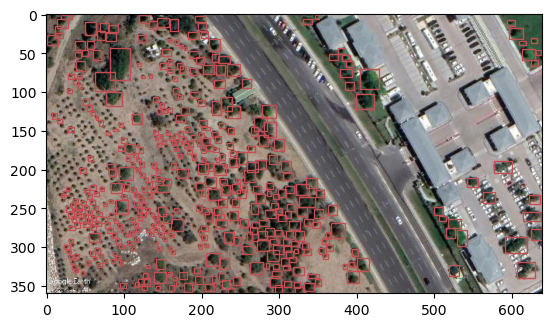

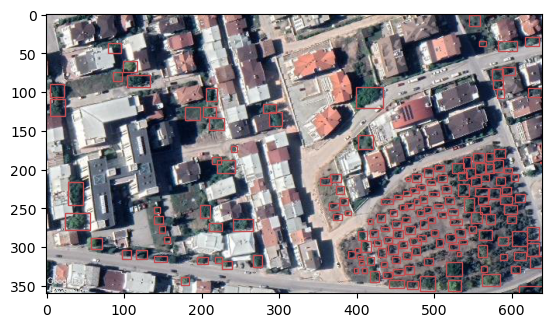

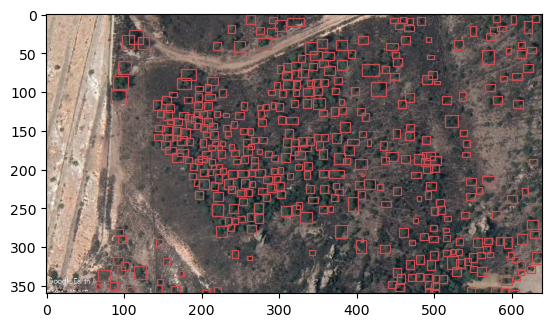

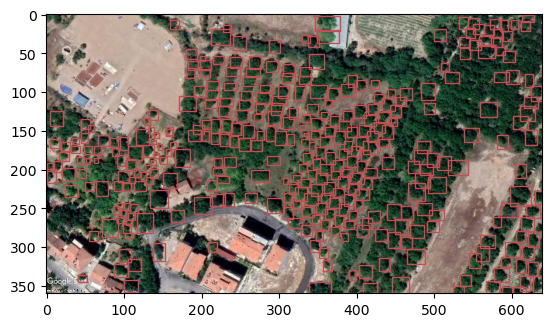

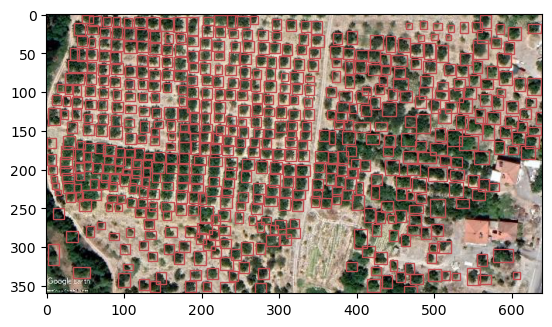

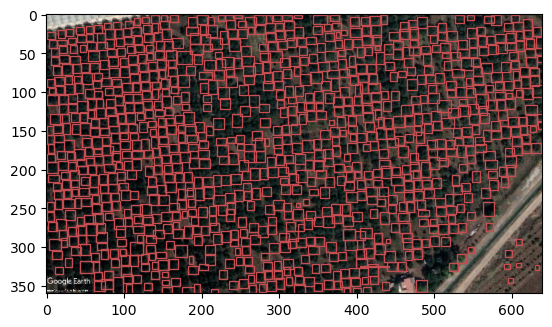

In [14]:
# Directories for images and labels
images_dir = image_directory + '/images/train'
labels_dir = image_directory + '/labels/train'

# Assuming file names (without extension) match between images and labels
image_files = [os.path.join(images_dir, file) for file in os.listdir(images_dir) if file.endswith('.jpg')]
label_files = [os.path.join(labels_dir, os.path.splitext(os.path.basename(file))[0] + '.txt') for file in image_files]

# Limit to the first 2 images for demonstration
for img_path, label_path in zip(image_files, label_files[:6]):
    # Load the image using Matplotlib
    img = plt.imread(img_path)
    
    # Create a figure and axis for plotting
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # Check if the label file exists and read it
    if os.path.exists(label_path):
        with open(label_path, 'r') as file:
            labels = [line.strip().split() for line in file.readlines()]

        # Plot each bounding box from the labels
        for label in labels:
            class_id, x_center, y_center, width, height = map(float, label)
            # Adjust for matplotlib display
            x_center, y_center, width, height = x_center * img.shape[1], y_center * img.shape[0], width * img.shape[1], height * img.shape[0]
            rect = patches.Rectangle(
                ((x_center - width / 2), (y_center - height / 2)),
                width, height,
                linewidth=1, edgecolor='r', facecolor='none'
            )
            ax.add_patch(rect)

    # plt.axis('off')  # Hide axes
    plt.show()

## Train your model

In [15]:
# results = model.train(data='data/data.yaml', hyp='data/hyp.yaml', epochs=100)
results = model.train(data='data/data.yaml', epochs=100)

Ultralytics YOLOv8.1.43  Python-3.12.2 torch-2.2.2 CPU (Intel Core(TM) i7-1065G7 1.30GHz)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=data/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

train: Scanning C:\Users\DELL\Documents\python\MachineLerning\homework_4\homework_4\data\labels\train.cache... 7 images
val: Scanning C:\Users\DELL\Documents\python\MachineLerning\homework_4\homework_4\data\labels\val.cache... 3 images, 0 

Plotting labels to runs\detect\train\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      4.774      4.767      2.063       4926        640: 100%|██████████| 1/1 [00:13<00:00, 13.55
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655    0.00889    0.00483    0.00467    0.00208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      4.722      4.727      1.971       5327        640: 100%|██████████| 1/1 [00:12<00:00, 12.24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655       0.01    0.00544    0.00536    0.00265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      4.266      4.589      1.798       4409        640: 100%|██████████| 1/1 [00:14<00:00, 14.14
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655     0.0633     0.0344     0.0334     0.0138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      4.082      4.072      1.646       6737        640: 100%|██████████| 1/1 [00:16<00:00, 16.61
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.288      0.156      0.182      0.083



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      4.162       3.38      1.532       6378        640: 100%|██████████| 1/1 [00:17<00:00, 17.58
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.539      0.205        0.3      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      4.133      2.741      1.466       7087        640: 100%|██████████| 1/1 [00:16<00:00, 16.90
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.541      0.218      0.347      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G      3.543      2.566      1.412       4089        640: 100%|██████████| 1/1 [00:14<00:00, 14.61
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.423       0.23      0.361      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      3.149      2.142      1.329       3462        640: 100%|██████████| 1/1 [00:13<00:00, 13.47
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.427      0.232       0.36       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      3.935      1.867      1.279       8863        640: 100%|██████████| 1/1 [00:24<00:00, 24.04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.402      0.219      0.326      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G      3.199      1.627      1.131       4859        640: 100%|██████████| 1/1 [00:14<00:00, 14.38
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.381      0.207       0.26      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G       3.17      1.514      1.178       7038        640: 100%|██████████| 1/1 [00:18<00:00, 18.49
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.383      0.208      0.232     0.0998



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G      2.944      1.518       1.16       6270        640: 100%|██████████| 1/1 [00:14<00:00, 14.81
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.378      0.205      0.228     0.0995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      2.812      1.546      1.212       3906        640: 100%|██████████| 1/1 [00:13<00:00, 13.22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655        0.4      0.218      0.243      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G      3.019      1.241      1.092       7898        640: 100%|██████████| 1/1 [00:20<00:00, 20.97
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.443      0.241      0.275      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G       3.11      1.661      1.124       4605        640: 100%|██████████| 1/1 [00:15<00:00, 15.34
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.476      0.259      0.318      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G      2.501      1.235      1.066       3251        640: 100%|██████████| 1/1 [00:12<00:00, 12.74
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.496      0.269      0.365      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G      2.584      1.208      1.082       4061        640: 100%|██████████| 1/1 [00:14<00:00, 14.88
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.524      0.285      0.408      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G      3.355      1.344      1.134       6104        640: 100%|██████████| 1/1 [00:18<00:00, 18.83
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.524      0.285      0.408      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G      2.579      1.303      1.102       5028        640: 100%|██████████| 1/1 [00:15<00:00, 15.51
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.547      0.274       0.42       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G      2.474      1.135      1.055       5005        640: 100%|██████████| 1/1 [00:14<00:00, 14.11
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.547      0.274       0.42       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G      2.424       1.16        1.1       5905        640: 100%|██████████| 1/1 [00:17<00:00, 17.31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655        0.6      0.304      0.465      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G      2.374      1.119      1.072       3475        640: 100%|██████████| 1/1 [00:11<00:00, 11.88
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655        0.6      0.304      0.465      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G      2.539      1.155      1.062       5587        640: 100%|██████████| 1/1 [00:17<00:00, 17.15
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.617      0.311      0.474      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G       3.04      1.231      1.056       6799        640: 100%|██████████| 1/1 [00:18<00:00, 18.35
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.617      0.311      0.474      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G       2.89      1.173      1.067       5978        640: 100%|██████████| 1/1 [00:15<00:00, 15.10
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.602      0.312      0.462      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G      2.946      1.143      1.037       8098        640: 100%|██████████| 1/1 [00:18<00:00, 18.32
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.602      0.312      0.462      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G      2.506      1.122      1.045       5215        640: 100%|██████████| 1/1 [00:15<00:00, 15.68
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.605      0.313      0.465      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G      2.703      1.141      1.041       5718        640: 100%|██████████| 1/1 [00:17<00:00, 17.63
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.605      0.313      0.465      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G      2.315      1.133      1.083       3896        640: 100%|██████████| 1/1 [00:13<00:00, 13.73
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.611      0.312      0.467      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G      2.719      1.102      1.005       7135        640: 100%|██████████| 1/1 [00:14<00:00, 14.82
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.611      0.312      0.467      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G      2.401      1.195      1.045       5306        640: 100%|██████████| 1/1 [00:13<00:00, 13.16
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.615      0.315       0.47       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G       2.44      1.151      1.053       4919        640: 100%|██████████| 1/1 [00:13<00:00, 13.54
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.615      0.315       0.47       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G      3.113      1.184      1.081       8766        640: 100%|██████████| 1/1 [00:20<00:00, 20.28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.639      0.317      0.481      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G      3.245      1.291      1.033       9058        640: 100%|██████████| 1/1 [00:21<00:00, 21.60
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.639      0.317      0.481      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G      2.692      1.146      1.019       6677        640: 100%|██████████| 1/1 [00:14<00:00, 14.60
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655       0.66       0.32      0.487      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G      2.582      1.067      1.027       7026        640: 100%|██████████| 1/1 [00:15<00:00, 15.90
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655       0.66       0.32      0.487      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G      2.646      1.109      1.017       6184        640: 100%|██████████| 1/1 [00:28<00:00, 28.44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0

                   all          3       1655      0.678      0.312      0.459      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G      2.491      1.084      1.059       6117        640: 100%|██████████| 1/1 [00:40<00:00, 40.48
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0

                   all          3       1655      0.678      0.312      0.459      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G      2.582      1.208      1.008       4883        640: 100%|██████████| 1/1 [00:43<00:00, 43.33
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<0

                   all          3       1655      0.708      0.303      0.448      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G      2.439      1.195       1.06       4555        640: 100%|██████████| 1/1 [00:32<00:00, 32.51
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0

                   all          3       1655      0.708      0.303      0.448      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G      2.408      1.134      1.006       5828        640: 100%|██████████| 1/1 [00:33<00:00, 33.97
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0

                   all          3       1655      0.763      0.301      0.458      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G      2.604      1.207      1.034       6584        640: 100%|██████████| 1/1 [00:46<00:00, 46.39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0

                   all          3       1655      0.763      0.301      0.458      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G      2.695      1.203       1.04       6380        640: 100%|██████████| 1/1 [00:45<00:00, 45.06
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0

                   all          3       1655       0.76      0.309       0.49      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G      2.475      1.157      1.032       6083        640: 100%|██████████| 1/1 [00:34<00:00, 34.65
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0

                   all          3       1655       0.76      0.309       0.49      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G      2.421      1.121      1.023       3881        640: 100%|██████████| 1/1 [00:32<00:00, 32.23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<0

                   all          3       1655      0.757      0.327      0.524      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G      2.409      1.127      1.023       4502        640: 100%|██████████| 1/1 [00:29<00:00, 29.99
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0

                   all          3       1655      0.757      0.327      0.524      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G      2.529      1.094     0.9907       4957        640: 100%|██████████| 1/1 [00:36<00:00, 36.73
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<0

                   all          3       1655      0.794      0.335      0.539      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G       2.23       1.01      1.002       4935        640: 100%|██████████| 1/1 [00:31<00:00, 31.26
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0

                   all          3       1655      0.794      0.335      0.539      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G      2.361      1.032      1.003       6084        640: 100%|██████████| 1/1 [00:39<00:00, 39.06
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0

                   all          3       1655      0.777      0.333      0.537      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G      2.466      1.085     0.9891       5397        640: 100%|██████████| 1/1 [00:38<00:00, 38.52
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0

                   all          3       1655      0.777      0.333      0.537      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G      2.491      1.114      1.005       5555        640: 100%|██████████| 1/1 [00:40<00:00, 40.04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<0

                   all          3       1655      0.789      0.334      0.538      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G      2.651      1.061     0.9899       8041        640: 100%|██████████| 1/1 [00:44<00:00, 44.96
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0

                   all          3       1655      0.789      0.334      0.538      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G      2.537      1.093     0.9935       5332        640: 100%|██████████| 1/1 [00:36<00:00, 36.17
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0

                   all          3       1655      0.789      0.334      0.538      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G      2.872      1.106      1.018       8367        640: 100%|██████████| 1/1 [00:48<00:00, 48.74
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0

                   all          3       1655      0.769      0.344      0.546      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G      2.395     0.9933     0.9521       7487        640: 100%|██████████| 1/1 [00:40<00:00, 40.76
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<0

                   all          3       1655      0.769      0.344      0.546      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G      2.296     0.9833     0.9782       5966        640: 100%|██████████| 1/1 [00:40<00:00, 40.26
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0

                   all          3       1655      0.769      0.344      0.546      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G      2.625       1.13     0.9789       5742        640: 100%|██████████| 1/1 [00:37<00:00, 37.22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<0

                   all          3       1655      0.764      0.343      0.546      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G      2.509       1.05     0.9882       5655        640: 100%|██████████| 1/1 [00:36<00:00, 36.57
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<0

                   all          3       1655      0.764      0.343      0.546      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G      2.432      1.054     0.9809       4625        640: 100%|██████████| 1/1 [00:33<00:00, 33.78
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<0

                   all          3       1655      0.764      0.343      0.546      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G      2.452      1.031     0.9771       7262        640: 100%|██████████| 1/1 [00:36<00:00, 36.60
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<0

                   all          3       1655      0.742      0.332      0.531      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G      2.469      1.032     0.9639       5622        640: 100%|██████████| 1/1 [00:38<00:00, 38.42
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<0

                   all          3       1655      0.742      0.332      0.531      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G      2.725      1.105     0.9618       6870        640: 100%|██████████| 1/1 [00:48<00:00, 48.90
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0

                   all          3       1655      0.742      0.332      0.531      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G      2.452      1.125      0.993       3597        640: 100%|██████████| 1/1 [00:29<00:00, 29.95
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0

                   all          3       1655      0.751      0.343      0.538      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G      2.314      1.055     0.9931       4459        640: 100%|██████████| 1/1 [00:33<00:00, 33.73
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0

                   all          3       1655      0.751      0.343      0.538      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G       2.31      1.074      1.015       4991        640: 100%|██████████| 1/1 [00:38<00:00, 38.35
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0

                   all          3       1655      0.751      0.343      0.538      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G      2.377      1.009     0.9758       7188        640: 100%|██████████| 1/1 [00:41<00:00, 41.11
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<0

                   all          3       1655       0.82      0.336      0.546      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G      2.303      1.014     0.9637       7078        640: 100%|██████████| 1/1 [00:33<00:00, 33.68
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0

                   all          3       1655       0.82      0.336      0.546      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G      2.469      1.056     0.9726       6016        640: 100%|██████████| 1/1 [00:37<00:00, 37.64
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0

                   all          3       1655       0.82      0.336      0.546      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G      2.503      1.082      1.006       5917        640: 100%|██████████| 1/1 [00:36<00:00, 36.69
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<0

                   all          3       1655      0.801      0.348      0.555      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G      2.542     0.9924     0.9617       7655        640: 100%|██████████| 1/1 [00:42<00:00, 42.33
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<0

                   all          3       1655      0.801      0.348      0.555      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G      2.317      1.009      0.977       7052        640: 100%|██████████| 1/1 [00:43<00:00, 43.88
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0

                   all          3       1655      0.801      0.348      0.555      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100         0G      2.256      1.029     0.9877       4775        640: 100%|██████████| 1/1 [00:30<00:00, 30.98
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<0

                   all          3       1655      0.813      0.348      0.558      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G      2.662      1.049     0.9575       7067        640: 100%|██████████| 1/1 [00:46<00:00, 46.34
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<0

                   all          3       1655      0.813      0.348      0.558      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G      2.361      1.002     0.9737       6338        640: 100%|██████████| 1/1 [00:34<00:00, 34.62
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<0

                   all          3       1655      0.813      0.348      0.558      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100         0G      2.377      1.027     0.9771       4983        640: 100%|██████████| 1/1 [00:31<00:00, 31.94
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<0

                   all          3       1655      0.816      0.349      0.561      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         0G      2.628      1.049     0.9671       9220        640: 100%|██████████| 1/1 [00:50<00:00, 50.30
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<0

                   all          3       1655      0.816      0.349      0.561      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G      2.259      1.004     0.9657       4616        640: 100%|██████████| 1/1 [00:37<00:00, 37.33
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0

                   all          3       1655      0.816      0.349      0.561      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G      2.103     0.9699      1.005       3461        640: 100%|██████████| 1/1 [00:29<00:00, 29.35
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0

                   all          3       1655      0.788      0.349      0.556      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G      2.328      1.022     0.9759       7468        640: 100%|██████████| 1/1 [00:41<00:00, 41.28
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0

                   all          3       1655      0.788      0.349      0.556      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G      2.256     0.9543      0.966       5903        640: 100%|██████████| 1/1 [00:33<00:00, 33.85
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<0

                   all          3       1655      0.788      0.349      0.556      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         0G      2.234      1.127     0.9886       3005        640: 100%|██████████| 1/1 [00:30<00:00, 30.91
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0

                   all          3       1655      0.785      0.352      0.555      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G      2.188      1.017      1.001       4175        640: 100%|██████████| 1/1 [00:31<00:00, 31.96
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<0

                   all          3       1655      0.785      0.352      0.555      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G      3.012      1.192     0.9998       8973        640: 100%|██████████| 1/1 [00:50<00:00, 50.68
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<0

                   all          3       1655      0.785      0.352      0.555      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G      2.245       1.06      1.023       4531        640: 100%|██████████| 1/1 [00:37<00:00, 37.80
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<0

                   all          3       1655      0.802       0.35      0.554      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100         0G      2.163      1.005      0.994       4773        640: 100%|██████████| 1/1 [00:36<00:00, 36.13
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<0

                   all          3       1655      0.802       0.35      0.554      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G      2.051     0.9683     0.9935       4362        640: 100%|██████████| 1/1 [00:27<00:00, 27.05
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<0

                   all          3       1655      0.802       0.35      0.554      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100         0G      2.304      0.989     0.9675       5647        640: 100%|██████████| 1/1 [00:37<00:00, 37.99
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<0

                   all          3       1655      0.802       0.35      0.554      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100         0G      2.671       1.11     0.9941       7978        640: 100%|██████████| 1/1 [00:39<00:00, 39.18
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0

                   all          3       1655      0.832      0.346      0.558      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G      2.389      1.003     0.9796       6133        640: 100%|██████████| 1/1 [00:15<00:00, 15.46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0

                   all          3       1655      0.832      0.346      0.558      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G      3.427      1.312      1.038       9707        640: 100%|██████████| 1/1 [00:19<00:00, 19.74
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.832      0.346      0.558      0.284


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100         0G      2.234      1.176     0.9471       3414        640: 100%|██████████| 1/1 [00:12<00:00, 12.15
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.832      0.346      0.558      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G      2.112     0.9734      0.979       3202        640: 100%|██████████| 1/1 [00:11<00:00, 11.25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.812      0.357      0.567      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100         0G      2.219      1.311       0.93       3566        640: 100%|██████████| 1/1 [00:12<00:00, 12.66
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.812      0.357      0.567      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100         0G      2.143      1.091      0.973       3305        640: 100%|██████████| 1/1 [00:11<00:00, 11.94
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.812      0.357      0.567      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100         0G      2.169      1.213     0.9296       3455        640: 100%|██████████| 1/1 [00:12<00:00, 12.36
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.812      0.357      0.567      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G      2.802       1.91      0.992       3555        640: 100%|██████████| 1/1 [00:12<00:00, 12.54
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.796      0.358      0.566      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G      2.471      1.407     0.9534       3559        640: 100%|██████████| 1/1 [00:12<00:00, 12.57
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.796      0.358      0.566      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G      2.334      1.257     0.9603       3381        640: 100%|██████████| 1/1 [00:12<00:00, 12.54
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.796      0.358      0.566      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G      2.358      1.266     0.9384       3605        640: 100%|██████████| 1/1 [00:12<00:00, 12.45
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.796      0.358      0.566      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         0G      2.066     0.9646     0.9893       3108        640: 100%|██████████| 1/1 [00:11<00:00, 11.31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<0

                   all          3       1655      0.857       0.35       0.57      0.288



100 epochs completed in 0.886 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train\weights\best.pt, 22.5MB

Validating runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.1.43  Python-3.12.2 torch-2.2.2 CPU (Intel Core(TM) i7-1065G7 1.30GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          3       1655      0.857       0.35       0.57      0.288
Speed: 1.3ms preprocess, 219.7ms inference, 0.0ms loss, 40.0ms postprocess per image
Results saved to runs\detect\train


## See the results
YOLO saves the results (model loss, prediction examples, mAP, etc.) in a folder called "runs". Use these to answer the homework questions.

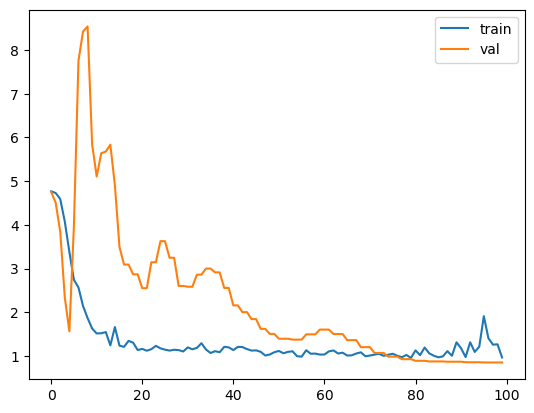

In [57]:
import pandas as pd
path = r"runs/detect/train/results.csv"
Result = pd.read_csv(path)
plt.plot(Result['         train/cls_loss'], label = "train")
plt.plot(Result['           val/cls_loss'], label = "val")
plt.legend()
plt.show()


In [42]:
from PIL import Image
import os

def get_png_files(folder_path):
    png_files = []
    for file in os.listdir(folder_path):
        if file.endswith(".png"):
            png_files.append(os.path.join(folder_path, file))
    return png_files
TLVimage_directory = 'data/trees_inference'
pngList = get_png_files(TLVimage_directory)

# image_path = 'data/trees_inference/1.png'

# # Load the image
# img = Image.open(image_path)

# Perform inference
results = model(pngList)
Trees = 0
save_dir = 'C:/Users/DELL/Documents/python/MachineLerning/homework_4/homework_4/Predict/'

for i in range(len(results)):
    Trees += len(results[i].boxes)
    results[i].show()
print(Trees)


0: 640x640 89 trees, 314.0ms
1: 640x640 58 trees, 314.0ms
2: 640x640 54 trees, 314.0ms
3: 640x640 69 trees, 314.0ms
4: 640x640 109 trees, 314.0ms
5: 640x640 116 trees, 314.0ms
6: 640x640 153 trees, 314.0ms
7: 640x640 115 trees, 314.0ms
8: 640x640 131 trees, 314.0ms
9: 640x640 89 trees, 314.0ms
10: 640x640 73 trees, 314.0ms
11: 640x640 180 trees, 314.0ms
12: 640x640 115 trees, 314.0ms
13: 640x640 148 trees, 314.0ms
14: 640x640 99 trees, 314.0ms
15: 640x640 77 trees, 314.0ms
16: 640x640 48 trees, 314.0ms
17: 640x640 64 trees, 314.0ms
18: 640x640 94 trees, 314.0ms
19: 640x640 103 trees, 314.0ms
Speed: 4.2ms preprocess, 314.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
1984
